# IM939 - Lab 6 - Part 1 - Setup and Illusions

In this lab we are going to look at visualisations. We will consider 3 'illusions' then misleading visualisations including bar plots, line plots and choropleths.

We will be using two new packages:

* Altair - a plotting library which has more flexability than seaborn. It is a little more complex and examples can be found [here](https://altair-viz.github.io/gallery/).
* Geopandas - an extension of the pandas library which allows us to work with geospatial data. The geopandas documentation is [here](https://geopandas.org).

To install these packages you will need to open up the terminal in your python environment. By starting the Anaconda Navigator, going to the Envrionments tab, then clicking on the plus button and slicking on Open Terminal (this may be powershell or command line on Windows 10).

<img src="terminal_menu.png">

The terminal which appears should start with (base) to indicate you are in the base environment.

<img src="terminal_window.png">

To install altair type in 

```bash
pip install altair
```

and press enter. Several packages should install and you should see a message letting you know altair has been installed.

<img src="altair_installed.png">

Next, install geopandas by typing the below into the terminal and pressing enter.

```bash
pip install geopandas
```

You should see something like the below once geopandas is installed.

<img src="geopandas_installed.png">

You may need to restart your Python kernel (or stop and restart your notebook) to be able to use the packages.

If the packages are installed then you should be able to run the below cell with no errors.

In [2]:
import altair as alt
import geopandas as gpd

## Clustering illusion

You can find details of the clustering illusion [here](https://en.wikipedia.org/wiki/Clustering_illusion), [here](https://www.sciencedirect.com/science/article/abs/pii/004269899090160M), and [here](https://www.sciencedirect.com/science/article/pii/S0042698906000927).

The illusion suggests you should automatically try and see clusters in random data.

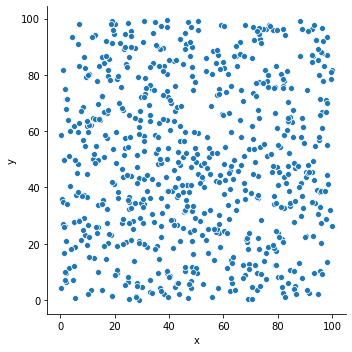

In [3]:
import numpy as np
import seaborn as sns
import pandas as pd

n = 700

d = {'x': np.random.uniform(0, 100, n), 'y': np.random.uniform(0, 100, n)}
df = pd.DataFrame(d)

sns.relplot(data = df, x = 'x', y = 'y')

The syntax for building this type in Altair is pretty straight forward.

In [4]:
alt.Chart(df).mark_circle(size=5).encode(
    x='x',
    y='y')

alt.Chart(...)

To remove those pesky lines we need to specify we want an X and Y axis without grid lines.

In [5]:
alt.Chart(df).mark_circle(size=5).encode(
    alt.X('x', axis=alt.Axis(grid=False)),
    alt.Y('y', axis=alt.Axis(grid=False)))

alt.Chart(...)

We will do a lot of altering axis and colors in altair. We do this by specifying alt.axistype and then passing various options.

Do you see any clustering the in the above plots? What about if we give names to the different columns?

In [6]:
alt.Chart(df).mark_circle(size=5).encode(
    alt.X('x', axis=alt.Axis(grid=False, title='Height')),
    alt.Y('y', axis=alt.Axis(grid=False, title='Weight')))

alt.Chart(...)

Another example of the clustering illusion is the idea of 'streaks'. That we see a pattern from a small sample and extrapolate out.

What do you expect the next dice role to be?

In [7]:
n_rolls = 10
d = {'round': np.linspace(1,n_rolls,n_rolls), 'roll': np.random.randint(1,6,n_rolls)}
df_dice = pd.DataFrame(d)
df_dice

,round,roll
0,1.0,3
1,2.0,5
2,3.0,3
3,4.0,1
4,5.0,3
5,6.0,1
6,7.0,3
7,8.0,2
8,9.0,1
9,10.0,5


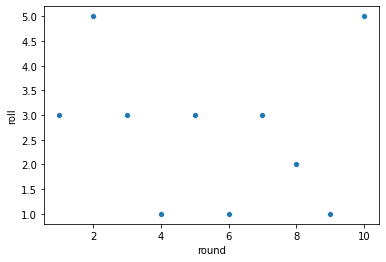

In [8]:
sns.scatterplot(data=df_dice, x='round', y='roll')

In [9]:
alt.Chart(df_dice).mark_circle(size=20).encode(
    alt.X('round', axis=alt.Axis(grid=False)),
    alt.Y('roll', axis=alt.Axis(grid=False)))

alt.Chart(...)

Each number on the dice will occur the same number of times. Any patterns you see are due to extrapolating based on a small sample. We can check that though by rolling the 'dice' 1,000,000 times.

In [10]:
n_rolls = 1000000
d = {'round': np.linspace(1,n_rolls,n_rolls), 'roll': np.random.randint(1,6,n_rolls)}
df_dice_many = pd.DataFrame(d)

df_dice_many.groupby('roll').count()

,round
roll,
1,200500
2,199415
3,200049
4,199913
5,200123


# Weber-Fechner Law

Taken from Valdez, et. al. (2018):

'The Weber-Fechner Law is a famous finding of early psychophysics indicating that differences between stimuli are detected on a logarithmic scale. It takes more additional millimeters of radius to discern two larger circles than two smaller circles. This type of bias is probably one of the most researched biases in visualization research.'

Let us see if we can create a plot to demonstrate it.

We will load in the car crashes dataset from seaborn. Documentation of the data is [here](https://www.kaggle.com/fivethirtyeight/fivethirtyeight-bad-drivers-dataset).

In [11]:
df_crashes = sns.load_dataset('car_crashes')
df_crashes.head()

,total,speeding,alcohol,not_distracted,no_previous,ins_premium,ins_losses,abbrev
0,18.8,7.332,5.640,18.048,15.040,784.55,145.08,AL
1,18.1,7.421,4.525,16.290,17.014,1053.48,133.93,AK
2,18.6,6.510,5.208,15.624,17.856,899.47,110.35,AZ
3,22.4,4.032,5.824,21.056,21.280,827.34,142.39,AR
4,12.0,4.200,3.360,10.920,10.680,878.41,165.63,CA


To illustrate this 'illusion' we will plot the percentage of drivers speeding, percentage of alcohol impaired and set the size of the point equal to the percentage of drivers not previously involves in any accident. Each point is an american state.

Are there any relationships or patterns in the data?

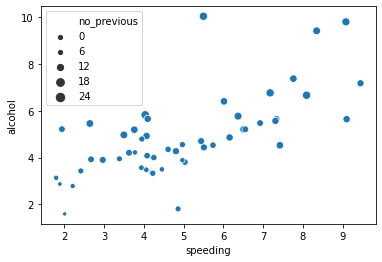

In [12]:
sns.scatterplot(data=df_crashes, x='speeding', y='alcohol', size='no_previous')

Is it easier to distinguish the different sizes in the below plot?

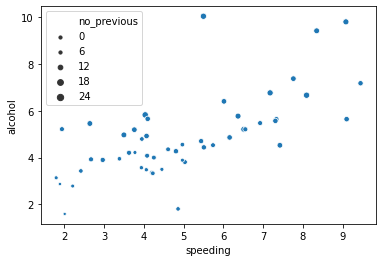

In [13]:
sns.scatterplot(data=df_crashes,
                x='speeding',
                y='alcohol',
                size='no_previous',
                sizes=(10,40))

How about this one?

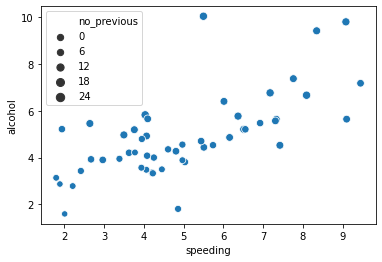

In [14]:
sns.scatterplot(data=df_crashes,
                x='speeding',
                y='alcohol',
                size='no_previous',
                sizes=(40,70))

The values are the same. We have just changed the range of sizes.

We can do much the same in altair.

In [15]:
alt.Chart(df_crashes).mark_circle().encode(
    x='speeding',
    y='alcohol',
    size='no_previous'
)

alt.Chart(...)

In [16]:
alt.Chart(df_crashes).mark_circle().encode(
    x='speeding',
    y='alcohol',
    size = alt.Size('no_previous', scale=alt.Scale(range=[10,40]))
)

alt.Chart(...)

In [17]:
alt.Chart(df_crashes).mark_circle().encode(
    x='speeding',
    y='alcohol',
    size = alt.Size('no_previous', scale=alt.Scale(range=[40,70]))
)

alt.Chart(...)

Have you come across any other illusions? If so, try and plot them out. I sometimes find it easier to understand these things through creating simple illustrations of my own.